# Análise de Gases

## Coleta de dados

Para a coleta dos dados foram preparadas 20 câmeras sendo que

- as câmeras 1 a 5 não eram cobertas com palha,
- as câmeras 6 a 10 eram cobertas com 1/3 de palha,
- as câmeras 11 a 15 eram cobertas com 2/3 de palha e
- as câmeras 16 a 20 eram totalmente cobertas de palha.

Para cada câmera foi feito a medida utilizando diferentes intervalos de tempo (0s, 15s e 30s).

A medida foi repedita ....

## Tratamento dos dados

Os dados foram pré-processados utilizando a biblioteca Pandas. ...

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import pandas

In [9]:
meus_dados = pandas.read_csv("example.csv", sep=";", parse_dates=[[0,1]],
               converters={'chamber volume': lambda x: float(x.replace(',','.')),
                           'chamber area': lambda x: float(x.replace(',','.')),
                           'Air C T': lambda x: float(x.replace(',','.')),
                           'Pressure (atm)': lambda x: float(x.replace(',','.'))})

In [10]:
meus_dados.head()

,Date_Time,Chamber,Treatment,sampling time,chamber volume,chamber area,Soil C T,Air C T,K T,Pressure (mb),Pressure (atm)
0,2013-11-24 09:00:00,1,Sem palha,0,83.6,4.761905,16,19.4,289,969,0.956403
1,2013-11-24 09:00:00,1,Sem palha,15,83.6,4.761905,16,19.4,289,969,0.956403
2,2013-11-24 09:00:00,1,Sem palha,30,83.6,4.761905,16,19.4,289,969,0.956403
3,2013-11-24 09:00:00,2,Sem palha,0,86.2,4.761905,16,19.4,289,969,0.956403
4,2013-11-24 09:00:00,2,Sem palha,15,86.2,4.761905,16,19.4,289,969,0.956403


## Análise de dados

A análise de dados também foi feita utilizando a biblioteca Pandas. ...

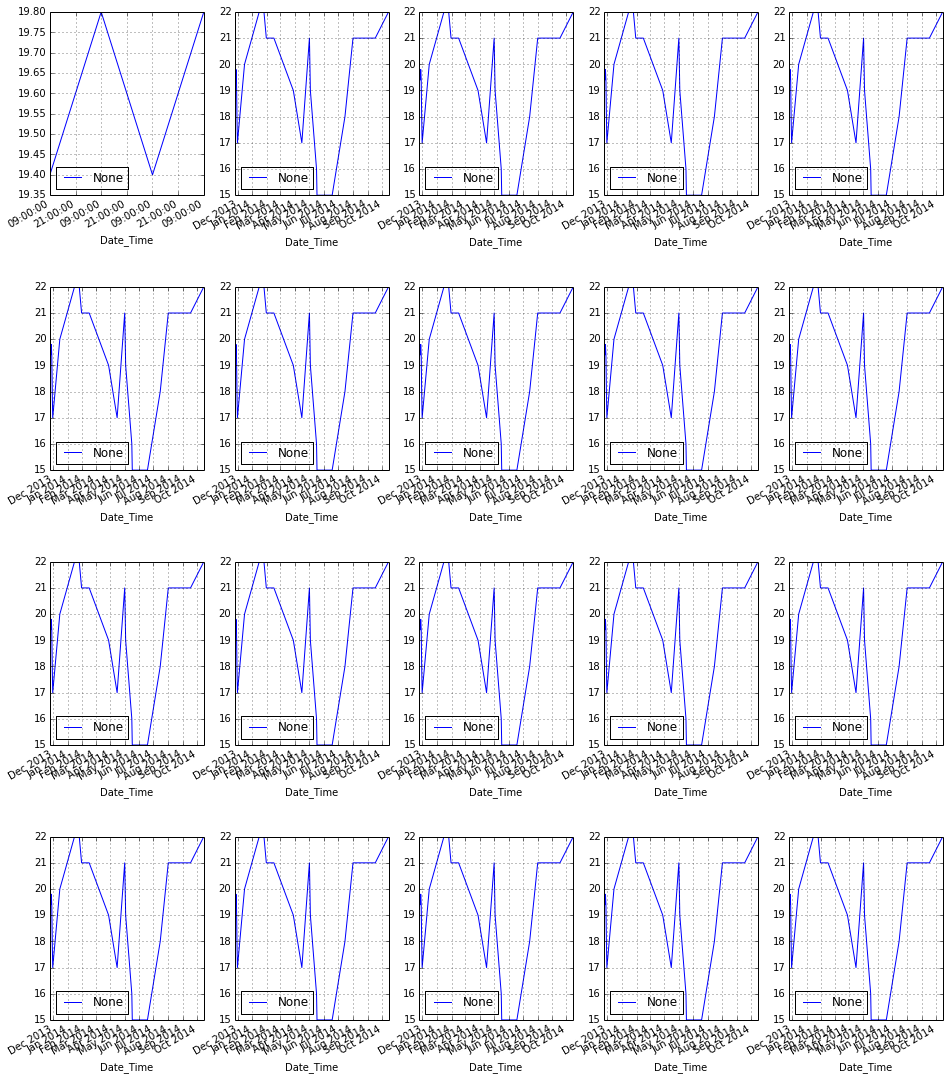

In [31]:
# Chambers 1, 2, 3, 4, 5 only has Treatment equals "Sem palha"
# Chambers 6, 7, 8, 9, 10 only has Treatment equals "1/3 palha"
# Chambers 11, 12, 13, 14, 15 only has Treatment equals "2/3 palha"
# Chambers 16, 17, 18, 19, 20 only has Treatment equals "Palha total"
fig, axes = plt.subplots(nrows=4, ncols=5)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace=0.5);
i = 0
for treatment in meus_dados["Treatment"].unique():
    j = 0
    for chamber in meus_dados[(meus_dados["Treatment"] == treatment)]["Chamber"].unique():
        meus_dados[(meus_dados["Chamber"] == chamber) & (meus_dados["Treatment"] == treatment) & 
                   (meus_dados["sampling time"] == 0)].plot(x=0, y="Air C T",
                                                           ax=axes[i,j])
        j = j + 1
    i = i + 1